# Fitting distributions to Honeybee foraging distance data using MLE
## Joseph Palmer: jpalmer18@imperial.ac.uk
### Royal Holloway University of London
### Imperial College London
### May 2019
---

In [1]:
# Imports
import pandas as pd
import numpy as np
from mletools import runmle
import matplotlib.pyplot as plt

In [2]:
# Load data into pandas dataframe and subset by locations
path = "~/Documents/CMEE/CMEECourseWork/Miniproject/Data/Distances.csv"
data = pd.read_csv(path)
rural_dist = data["Distance_Km"][data["Location"] == "ROT"]
urban_dist = data["Distance_Km"][data["Location"] == "ZSL"]

<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
{'p0': [0.7753555997180215, 0.8847763713989192, 0.6659348280371238]}
242.10566818657432
[0.7753556]


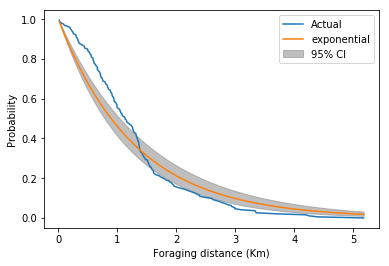

{'p0': [1.2897307912595841, 1.4283600155501246, 1.1511015669690436], 'p1': [0.8932227071763807, 1.0012315223272357, 0.7852138920255258]}
252.06170833791526
[1.28973079 0.89322271]


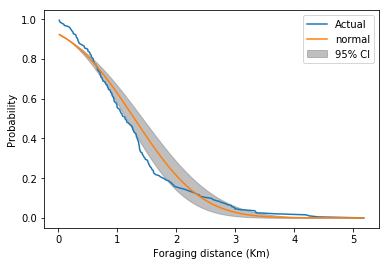

{'p0': [-0.02965255705289908, 0.09755288083470952, -0.15685799494050767], 'p1': [1.1312121193404703, 1.2929687812149928, 0.9694554574659477]}
-110.37295630417883
[-0.02965256  1.13121212]


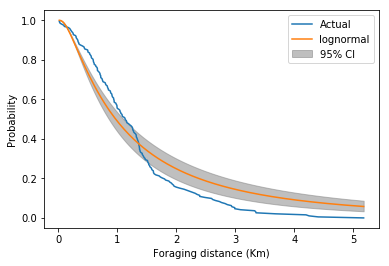

{'p0': [1.9098501967332169, 2.2622181598104913, 1.5574822336559424], 'p1': [1.480813066269148, 1.8275902867411058, 1.1340358457971904]}
222.25814111913465
[1.9098502  1.48081307]


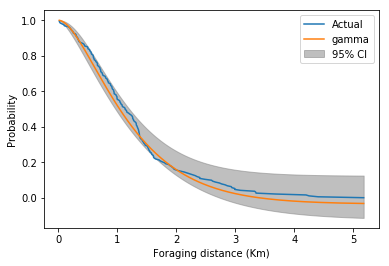

   index        Model  Loglike ParamNumber      AIC           wAIC
0      2    lognormal -110.373           2 -216.746   1.000000e+00
1      3        gamma  222.258           2  448.516  3.468565e-145
2      0  exponential  242.106           1  486.211  2.263460e-153
3      1       normal  252.062           2  508.123  3.950255e-158


In [4]:
# run models one by one
modellist = ["exponential", "normal", "lognormal", "gamma"]
aicdata = pd.DataFrame({"Model":modellist})
aicdata["Loglike"] = None
aicdata["ParamNumber"] = None
aicdata["AIC"] = None
figs = [0 for i in range(0, len(modellist))]

# test exponential data
data = np.random.lognormal(4.8, 1/1.8, 1000)
data = np.random.exponential(1/1.8, 100)
data = pd.DataFrame({"data":data})
data = data["data"]
print(type(data))
print(type(rural_dist))

for i in range(0, len(modellist)):
    # run model
    if modellist[i] == "exponential":
        start = [0.1]
    else:
        start = [0.1, 0.1]
    mod = runmle(data = rural_dist,
                 startest = start,
                 method = modellist[i])
    model = mod.ModelData()
    
    # get 95CI plots
    pred = mod.MLEPredict(model)
    if modellist[i] == "exponential":
        cis = mod.Getci2p(model)
        pred2 = mod.MLEPredictCI(cis, pred)
        fig = mod.PredictFig(pred2)
        
    else:
        cis = mod.Getci2p(model)
        pred2 = mod.MLEPredictCI(cis, pred)
        fig = mod.PredictFig(pred2)
    #with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    #print(pred2)
    print(cis)
    print(model.fun)
    print(model.x)
    fig.show()
    
    # store results for AIC table    
    aicdata.iloc[i, 1] = mod.GetLogLike(model)
    aicdata.iloc[i, 2] = len(model.x)
    aicdata.iloc[i, 3] = mod.AIC(model)

# calulcate weighted AIC scores
aicdata.sort_values(by=["AIC"], inplace = True)
aicdata.reset_index(inplace = True)
aicdata["wAIC"] = np.exp(-0.5 * (aicdata["AIC"].astype(float) - 
                         aicdata["AIC"].min()))

print(aicdata)
